In [3]:
%pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 5.0 MB/s eta 0:00:00 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [4]:
# allow to automatically update the imported modules
%load_ext autoreload
%autoreload 2

# allow to use relative path in notebooks
import os, sys
sys.path.append("../training")
dir2 = os.path.abspath('')
dir1 = os.path.dirname(dir2)
if not dir1 in sys.path: sys.path.append(dir1)

from training.data_loader import DataLoader
from training.model import Model
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
# load data
data_loader = DataLoader()
(x_train, y_train), (x_test, y_test) = data_loader.load_data()

# instantiate the model
model = Model()

100%|██████████| 170498071/170498071 [00:11<00:00, 14443154.41it/s]


Extracting ../../data/raw_dataset/cifar-10-python.tar.gz to ../../data/raw_dataset/
Files already downloaded and verified
Currently using: cpu


In [6]:
# create loss arrays for two data samples
def get_loss_arrays(known, unknown, test_known, test_unknown):
    """
        Compute the loss array for two data samples
        Input: Two Samples from Data - Known & Unknown (for both of them - train and test)
        Output: Loss Array for each sample - known_loss_array, unknown_loss_array
    """
    known_prob = model.predict(known)
    unknown_prob = model.predict(unknown)

    known_loss_array = [1-prob[test_known[i][0]] for i,prob in enumerate(known_prob)]
    unknown_loss_array = [1-prob[test_unknown[i][0]] for i,prob in enumerate(unknown_prob)]

    return known_loss_array, unknown_loss_array

In [11]:
y_test[1][0]

8

In [7]:
known_loss_array, unknown_loss_array = get_loss_arrays(x_train[:100], x_test[:100], y_train[:100], y_test[:100])

100%|██████████| 100/100 [00:01<00:00, 74.88it/s]


In [8]:
def plot_loss_arrays(arr1, arr2):
    """
        Plot both loss arrays - histograms
        Input: Loss arrays for Known/ Unknown Datasets 
        Output: Plot of both losses
    """
    plt.figure(figsize=(10, 6))

    fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

    axs[0].hist(arr1, bins=20)
    axs[1].hist(arr2, bins=20)

<Figure size 1000x600 with 0 Axes>

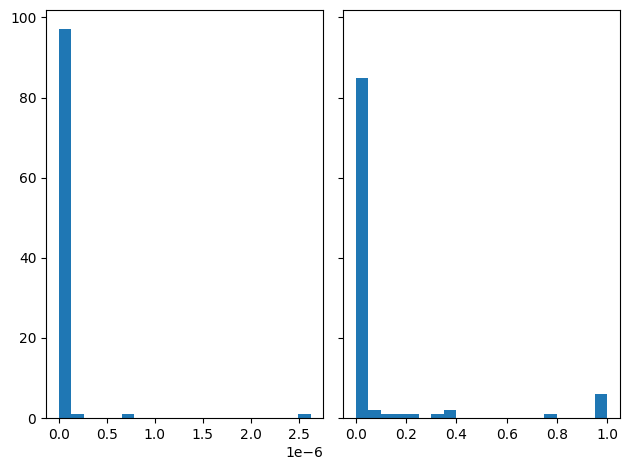

In [9]:
plot_loss_arrays(known_loss_array, unknown_loss_array)

In [38]:
# https://www.researchgate.net/publication/291361625_Is_the_data_normally_distributed
# https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3693611/ 
def check_normal_distribution(data):
    """
        Check if a loss array follow the gaussian distribution
        Input: Loss array
        Output: Boolan value - Does the function follow a Gaussian Distribution?
    """
    stat_shapiro, p_value_shapiro = stats.shapiro(data)
    stat_ks, p_value_ks = stats.kstest(data, stats.norm.cdf)
    alpha = 0.05
    if p_value_shapiro < alpha and p_value_ks < alpha:
        return True
    else:
        return False

In [39]:
check_normal_distribution(known_loss_array)

True

In [40]:
def compute_mean_and_std(data):
    """
        Compute the mean and the standard deviation of a loss array
        Precondition: data should be a normal distribution; 
        Input: Loss array 
        Output: mean, standard deviation
    """
    if not check_normal_distribution(data):
        return None

    mean_value = np.mean(data)
    std_deviation = np.std(data)

    return mean_value, std_deviation

In [41]:
compute_mean_and_std(known_loss_array)

(0.4390463980846107, 0.33751540745888675)